In [2]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

from anemoi.inference.checkpoint import Checkpoint

In [12]:
import torch

In [3]:
plt.style.use("~/nice.mplstyle")

In [7]:
#c = Checkpoint("/pscratch/sd/t/timothys/nested-eagle/1.00deg-15km/crps06h/experiments/base/noise32/checkpoint/fd4366b207b8431b8bd947f270c3a43e/inference-last.ckpt")

In [75]:
cLast = torch.load("/pscratch/sd/t/timothys/nested-eagle/1.00deg-15km/crps06h/experiments/base/noise32/checkpoint/fd4366b207b8431b8bd947f270c3a43e/inference-last.ckpt", weights_only=False)
cFirst = torch.load("/pscratch/sd/t/timothys/nested-eagle/1.00deg-15km/crps06h/experiments/base/noise32/checkpoint/fd4366b207b8431b8bd947f270c3a43e/inference-anemoi-by_epoch-epoch_000-step_000727.ckpt", weights_only=False)
#cFirst = torch.load("/pscratch/sd/t/timothys/nested-eagle/1.00deg-15km/crps06h/experiments/base/noise32/checkpoint/fd4366b207b8431b8bd947f270c3a43e/inference-anemoi-by_epoch-epoch_005-step_004362.ckpt", weights_only=False)
cMid = torch.load("/pscratch/sd/t/timothys/nested-eagle/1.00deg-15km/crps06h/experiments/base/noise32/checkpoint/fd4366b207b8431b8bd947f270c3a43e/inference-anemoi-by_epoch-epoch_020-step_015267.ckpt", weights_only=False)

In [85]:
c.model.processor.proc[0].layer_norm_attention.scale

Linear(in_features=32, out_features=512, bias=True)

In [77]:
scales = {
    "1": [x.layer_norm_attention.scale.weight.norm().cpu().data for x in cFirst.model.processor.proc],
    "21": [x.layer_norm_attention.scale.weight.norm().cpu().data for x in cMid.model.processor.proc],
    "-1": [x.layer_norm_attention.scale.weight.norm().cpu().data for x in cLast.model.processor.proc],
}
biases = {
    "1": [x.layer_norm_attention.bias.weight.norm().cpu().data for x in cFirst.model.processor.proc],
    "21": [x.layer_norm_attention.bias.weight.norm().cpu().data for x in cMid.model.processor.proc],
    "-1": [x.layer_norm_attention.bias.weight.norm().cpu().data for x in cLast.model.processor.proc],
}

In [79]:
mscales = {
    "1": [x.layer_norm_mlp.scale.weight.norm().cpu().data for x in cFirst.model.processor.proc],
    "21": [x.layer_norm_mlp.scale.weight.norm().cpu().data for x in cMid.model.processor.proc],
    "-1": [x.layer_norm_mlp.scale.weight.norm().cpu().data for x in cLast.model.processor.proc],
}
mbiases = {
    "1": [x.layer_norm_mlp.bias.weight.norm().cpu().data for x in cFirst.model.processor.proc],
    "21": [x.layer_norm_mlp.bias.weight.norm().cpu().data for x in cMid.model.processor.proc],
    "-1": [x.layer_norm_mlp.bias.weight.norm().cpu().data for x in cLast.model.processor.proc],
}

In [96]:
def get_norms(ckpt, window_size=4320):
    attention = {"scale": [], "bias": []}
    mlp = {"scale": [], "bias": []}
    for i, proc in enumerate(ckpt.model.processor.proc):
        #radius = (i+1)*2*window_size
        radius = 1
        attention["scale"].append(proc.layer_norm_attention.scale.weight.norm().cpu().data/radius)
        attention["bias"].append(proc.layer_norm_attention.bias.weight.norm().cpu().data/radius)
        mlp["scale"].append(proc.layer_norm_mlp.scale.weight.norm().cpu().data/radius)
        mlp["bias"].append(proc.layer_norm_mlp.bias.weight.norm().cpu().data/radius)
    return attention, mlp

In [97]:
first = get_norms(cFirst)
mid = get_norms(cMid)
last = get_norms(cLast)

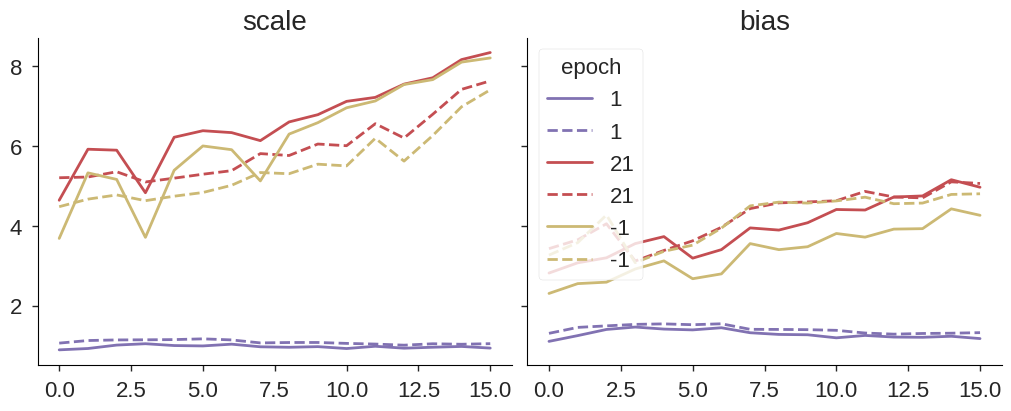

In [99]:
fig, axs = plt.subplots(1,2, figsize=(10, 4), sharey=True)


for i, (whichone, epoch) in enumerate(zip([first, mid, last], [1, 21, -1]), start=3):
    for thisdict, linestyle in zip(whichone, ["-", "--"]):
        for (label, y), ax in zip(thisdict.items(), axs):
            ax.plot(y, label=epoch, linestyle=linestyle, color=f"C{i}")
            ax.set(title=label)
axs[-1].legend(title="epoch")

#for y, m, label, ax in zip([scales, biases], [mscales, mbiases], ["Scale", "Bias"], axs):
#    for i, (key, val) in enumerate(y.items(), start=3):
#        ax.plot(val, label=key, color=f"C{i}")
#    for i, (key, val) in enumerate(m.items(), start=3):
#        ax.plot(val, label=None, linestyle="--", color=f"C{i}")
#    ax.legend()
#    ax.set(title=label, ylabel=r"$||\cdot||_{F}$" if ax.get_subplotspec().is_first_col() else "")
#
#
#

In [100]:
c

AnemoiModelInterface(
  (pre_processors): ModuleDict(
    (data): Processors [forward](ModuleDict(
      (normalizer): InputNormalizer()
    ))
  )
  (post_processors): ModuleDict(
    (data): Processors [inverse](ModuleDict(
      (normalizer): InputNormalizer()
    ))
  )
  (pre_processors_tendencies): ModuleDict(
    (data): Processors [forward](ModuleDict(
      (normalizer): InputNormalizer()
    ))
  )
  (post_processors_tendencies): ModuleDict(
    (data): Processors [inverse](ModuleDict(
      (normalizer): InputNormalizer()
    ))
  )
  (model): AnemoiEnsModelEncProcDec(
    (node_attributes): ModuleDict(
      (data): NamedNodesAttributes(
        (trainable_tensors): ModuleDict(
          (data): TrainableTensor()
          (hidden): TrainableTensor()
        )
      )
    )
    (encoder_graph_provider): ModuleDict(
      (data): StaticGraphProvider(
        (trainable): TrainableTensor()
      )
    )
    (encoder): ModuleDict(
      (data): GraphTransformerForwardMapper(
 